In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [8]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int


In [9]:
def adder(state: AgentState) -> AgentState:
    """This node will add two numbers"""

    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node will subtract two numbers"""

    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will decide which node to go to next"""

    if state['operation'] == '+':
        return 'addition_operation'
    elif state['operation'] == '-':
        return 'subtraction_operation'

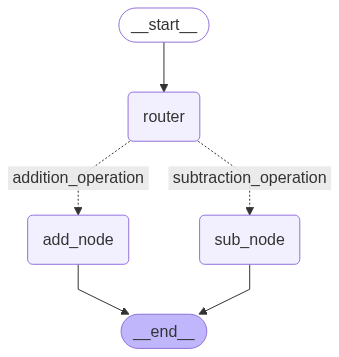

{'number1': 1, 'operation': '-', 'number2': 2, 'finalNumber': -1}


In [10]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("sub_node", subtractor)
graph.add_node("router", lambda state: state)   # pass through function

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "sub_node",
    }
)

graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

result = app.invoke({"number1": 1, "operation": "-", "number2": 2})
print(result)

